In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
Data = pd.read_csv('cneos_fireball_data.csv')

In [28]:
Data.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2022-09-15 02:49:02,22.7N,97.6E,31.5,NaN,NaN,NaN,NaN,2.700000e+10,0.095
1,2022-09-14 23:31:15,40.8N,63.4E,35.8,17.4,-13.9,-4.3,9.5,3.200000e+10,0.110
2,2022-09-04 03:54:55,20.0N,165.9E,14.0,21.9,18.4,-11.4,-3.5,2.400000e+10,0.086
3,2022-08-21 16:35:49,6.3S,51.5E,37.0,NaN,NaN,NaN,NaN,2.100000e+10,0.076
4,2022-08-14 07:39:18,35.0S,78.4E,55.5,NaN,NaN,NaN,NaN,4.680000e+11,1.200


### Question 1A:

To categorize each of the variables, I would describe none of these variables as categorical because they are all numerical. With all of these variables being numerical, I would further describe "Peak Brightness Date/Time," "Latitude," "Longitude," and "Altitude" as discrete whereas I would describe the rest of the variables as continuous because they are measurements. I would expect most of these variables to be either integer or float data types with the exception of "Peak Brightness Date/Time" as date/time, and "Latitude" and "Longitude" as objects or strings because they have N, S, E, W to represent the cardinal compass directions.

### Question 1B:

I was most surprised with the peak brightness variable being classified as an object rather than explicitly date/time. However the rest of the variables matched my expectations of the data types that they should be.

See code in cells below

In [29]:
Data = Data.rename(columns={"Peak Brightness Date/Time (UT)":"Peak.Bightness.Date.Time",
                                  "Latitude (deg.)":"Latitude", "Longitude (deg.)":"Longitude",
                                  "Altitude (km)":"Altitude", "Velocity (km/s)":"Velocity",
                                  "Total Radiated Energy (J)":"Total.Radiated.Energy",
                                  "Calculated Total Impact Energy (kt)":"Calculated.Total.Impact.Energy"}, errors = "raise")
Data.head()

,Peak.Bightness.Date.Time,Latitude,Longitude,Altitude,Velocity,vx,vy,vz,Total.Radiated.Energy,Calculated.Total.Impact.Energy
0,2022-09-15 02:49:02,22.7N,97.6E,31.5,NaN,NaN,NaN,NaN,2.700000e+10,0.095
1,2022-09-14 23:31:15,40.8N,63.4E,35.8,17.4,-13.9,-4.3,9.5,3.200000e+10,0.110
2,2022-09-04 03:54:55,20.0N,165.9E,14.0,21.9,18.4,-11.4,-3.5,2.400000e+10,0.086
3,2022-08-21 16:35:49,6.3S,51.5E,37.0,NaN,NaN,NaN,NaN,2.100000e+10,0.076
4,2022-08-14 07:39:18,35.0S,78.4E,55.5,NaN,NaN,NaN,NaN,4.680000e+11,1.200


In [30]:
print(Data.dtypes)

# Rows
print(Data.shape[0])
# Columns
print(Data.shape[1])

Peak.Bightness.Date.Time           object
Latitude                           object
Longitude                          object
Altitude                          float64
Velocity                          float64
vx                                float64
vy                                float64
vz                                float64
Total.Radiated.Energy             float64
Calculated.Total.Impact.Energy    float64
dtype: object
932
10


### Question 1C:

In [31]:
Data.Longitude = Data.Longitude.str.strip()
Data.Latitude = Data.Latitude.str.strip()
longdir = Data.Longitude.str[-1:]
latdir = Data.Latitude.str[-1:]

tempvals = Data.Latitude.str[:-1]
longvals = []

for i in tempvals:
    longvals = np.append(longvals,float(str(i)))
    
tempvals = Data.Longitude.str[:-1]
latvals = []

for i in tempvals:
    latvals = np.append(latvals,float(str(i)))

Longitude = []
Latitude = []

for i in range(0,len(longdir)):
    if (longdir[i] == 'S'):
        Longitude = np.append(Longitude, -longvals[i])
    else:
        Longitude = np.append(Longitude, longvals[i])
        
    if (latdir[i] == 'W'):
        Latitude = np.append(Latitude, -latvals[i])
    else:
        Latitude = np.append(Latitude, latvals[i])

Data.Longitude = Longitude
Data.Latitude = Latitude
Data.dtypes

Peak.Bightness.Date.Time           object
Latitude                          float64
Longitude                         float64
Altitude                          float64
Velocity                          float64
vx                                float64
vy                                float64
vz                                float64
Total.Radiated.Energy             float64
Calculated.Total.Impact.Energy    float64
dtype: object

In [32]:
Data.describe()

,Latitude,Longitude,Altitude,Velocity,vx,vy,vz,Total.Radiated.Energy,Calculated.Total.Impact.Energy
count,742.000000,742.000000,474.000000,278.000000,278.000000,278.00000,278.000000,9.320000e+02,932.000000
mean,89.887871,31.398248,36.071941,17.875540,-0.155755,-2.01223,-0.876619,7.573927e+11,1.230736
std,52.354907,20.564502,10.476231,5.599553,10.960195,11.05490,10.442363,1.239195e+13,14.675072
min,0.100000,0.000000,14.000000,9.800000,-35.400000,-43.50000,-31.200000,2.000000e+10,0.073000
25%,44.600000,14.500000,29.450000,14.100000,-8.500000,-9.97500,-9.175000,3.200000e+10,0.110000
50%,90.150000,29.700000,34.650000,16.900000,-0.850000,-2.90000,0.000000,6.300000e+10,0.200000
75%,136.100000,46.200000,40.650000,19.975000,8.475000,5.45000,6.675000,1.452500e+11,0.420000
max,180.000000,88.500000,74.000000,49.000000,27.800000,31.20000,27.000000,3.750000e+14,440.000000


In [33]:
from plotnine import *

/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: longvals.png
/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin : Removed 190 rows containing non-finite values.
/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin : Removed 190 rows containing non-finite values.


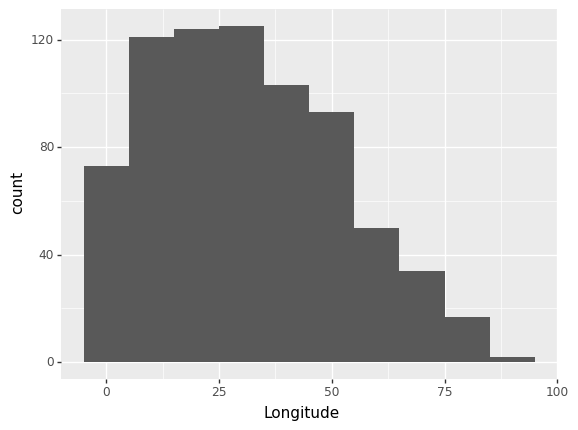

<ggplot: (8793160451759)>

In [34]:
longvals = (ggplot(Data, aes('Longitude'))
            + geom_histogram(binwidth=10))

ggsave(longvals, filename='longvals.png', dpi=300)

longvals

# Edit Caption into own words and delete this comment

The center of the distribution is at the Prime Meridian, or 0 degrees longitude. The historgram is somewhat symmetric, which could be considered the normal distribution. The longitudes are largely spread over -50 to 50 degrees, after which they taper off to the far extremes of the longitudes. This is a fairly broad distribution. Since all of the values are grouped together in the histogram, there are no outliers. This distribution is consistent with expectations because the Longitude values follow the normal distribution with a good symmetry at Longitude = 0.

In [11]:
Data.Longitude.sort_values(ascending=False)

530    88.5
827    82.3
58     81.1
820    80.0
929    78.7
       ... 
918     NaN
920     NaN
921     NaN
922     NaN
924     NaN
Name: Longitude, Length: 932, dtype: float64

### Question 1D:

See code in cells below

[Text(0.5, 0, 'Calculated Total Impact Energy (kJ)'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Calculated Total Impact Energy')]

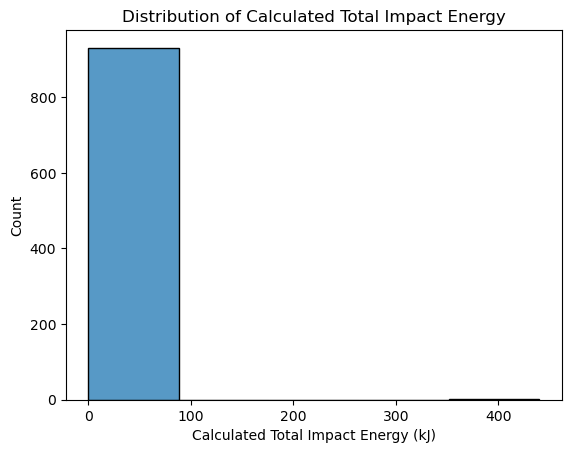

In [12]:

unlog = sns.histplot(data=Data, x=Data['Calculated.Total.Impact.Energy'], bins = 5)
unlog.set(xlabel ="Calculated Total Impact Energy (kJ)", ylabel = "Count", title ='Distribution of Calculated Total Impact Energy')




### Question 1E:

See code in cells below

In [13]:
data_log = np.log10(Data['Calculated.Total.Impact.Energy'])
data_log

0     -1.022276
1     -0.958607
2     -1.065502
3     -1.119186
4      0.079181
         ...   
927   -1.036212
928   -0.886057
929    0.146128
930    0.716003
931    1.146128
Name: Calculated.Total.Impact.Energy, Length: 932, dtype: float64

[Text(0.5, 0, 'log of Calculated Total Impact Energy (kJ)'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of log Calculated Total Impact Energy')]

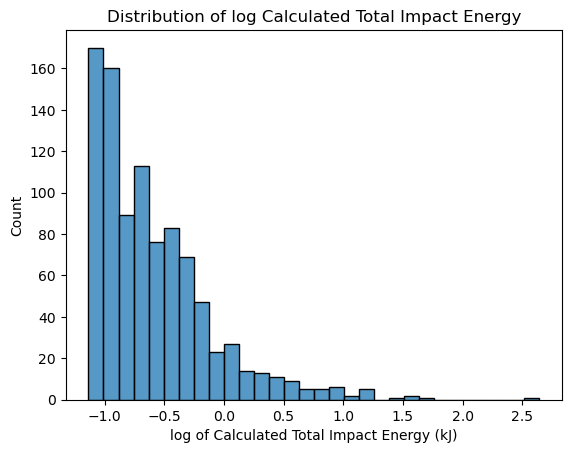

In [14]:
# Add axis labels
# Add Title
# Make graph bigger
# Make fonts bigger

logged = sns.histplot(data=Data, x=data_log, bins = 30)
logged.set(xlabel ="log of Calculated Total Impact Energy (kJ)", ylabel = "Count", 
           title ='Distribution of log Calculated Total Impact Energy')


The center of the distribution is at about -1.35, which is around the middle of the thickest part of the histogram. The shape of the distribution is skewed to the right indicated by its tail. The distriution also has a broad spread. There are outliers in the histogram after x=1.2 as the energy counts dropped off. A significant outlier exists which likely correlates to the 440 value in the original visualization. The only change from part D is that the distribution went from having a narrow spread to adopting a wider spread.

### Question 2:

See code in cells below

In [15]:
from zipfile import ZipFile as zf


In [16]:
# with zf("C:/Users/keeganballantyne/iCloud Drive/DATA 22700/Zip Files/Nat2021us.zip", 'r') as zObject:
#     zObject.extractall(
#         path="C:/Users/keeganballantyne/iCloud Drive/DATA 22700/Zip Files/Nat2021us.zip")

birth = pd.read_csv("Natality, 2007-2020.txt", sep = '\t')

# Use terminal to unzip
# Work through the user guide to parse through positions of interest
# Use string extraction to extract character positions of interest
# Look the demo last Thursday for more info on data cleaning of data set

In [17]:
# What does the first and second item look like?
# Look at demo last week on Thursday to adapt position into dataframe

birth.shape

(153, 6)

In [18]:
birth.head()

,Notes,State,State Code,Delivery Method,Delivery Method Code,Births
0,NaN,Alabama,1.0,Vaginal,1.0,37480.0
1,NaN,Alabama,1.0,Cesarean,2.0,20161.0
2,NaN,Alaska,2.0,Vaginal,1.0,7299.0
3,NaN,Alaska,2.0,Cesarean,2.0,2170.0
4,NaN,Arizona,4.0,Vaginal,1.0,55076.0


In [19]:
birth = birth.drop(columns = ['Notes', "State Code", "Delivery Method Code"])

In [20]:
birth = birth.dropna()
birth

,State,Delivery Method,Births
0,Alabama,Vaginal,37480.0
1,Alabama,Cesarean,20161.0
2,Alaska,Vaginal,7299.0
3,Alaska,Cesarean,2170.0
4,Arizona,Vaginal,55076.0
...,...,...,...
119,Wisconsin,Vaginal,44417.0
120,Wisconsin,Cesarean,16145.0
121,Wisconsin,Unknown or Not Stated,32.0
122,Wyoming,Vaginal,4512.0


In [21]:
birth = birth.loc[birth["Delivery Method"] != "Unknown or Not Stated"]
birth

,State,Delivery Method,Births
0,Alabama,Vaginal,37480.0
1,Alabama,Cesarean,20161.0
2,Alaska,Vaginal,7299.0
3,Alaska,Cesarean,2170.0
4,Arizona,Vaginal,55076.0
...,...,...,...
118,West Virginia,Cesarean,5922.0
119,Wisconsin,Vaginal,44417.0
120,Wisconsin,Cesarean,16145.0
122,Wyoming,Vaginal,4512.0


In [22]:
birth = birth.sort_values('Births',ascending=True)
birth['State'] = pd.Categorical(birth.State, categories=pd.unique(birth.State))
birth['Births'] = birth.Births/1000
birth.head()

,State,Delivery Method,Births
110,Vermont,Cesarean,1.382
123,Wyoming,Cesarean,1.615
3,Alaska,Cesarean,2.170
101,South Dakota,Cesarean,2.702
83,North Dakota,Cesarean,2.711


In [23]:
from plotnine import *

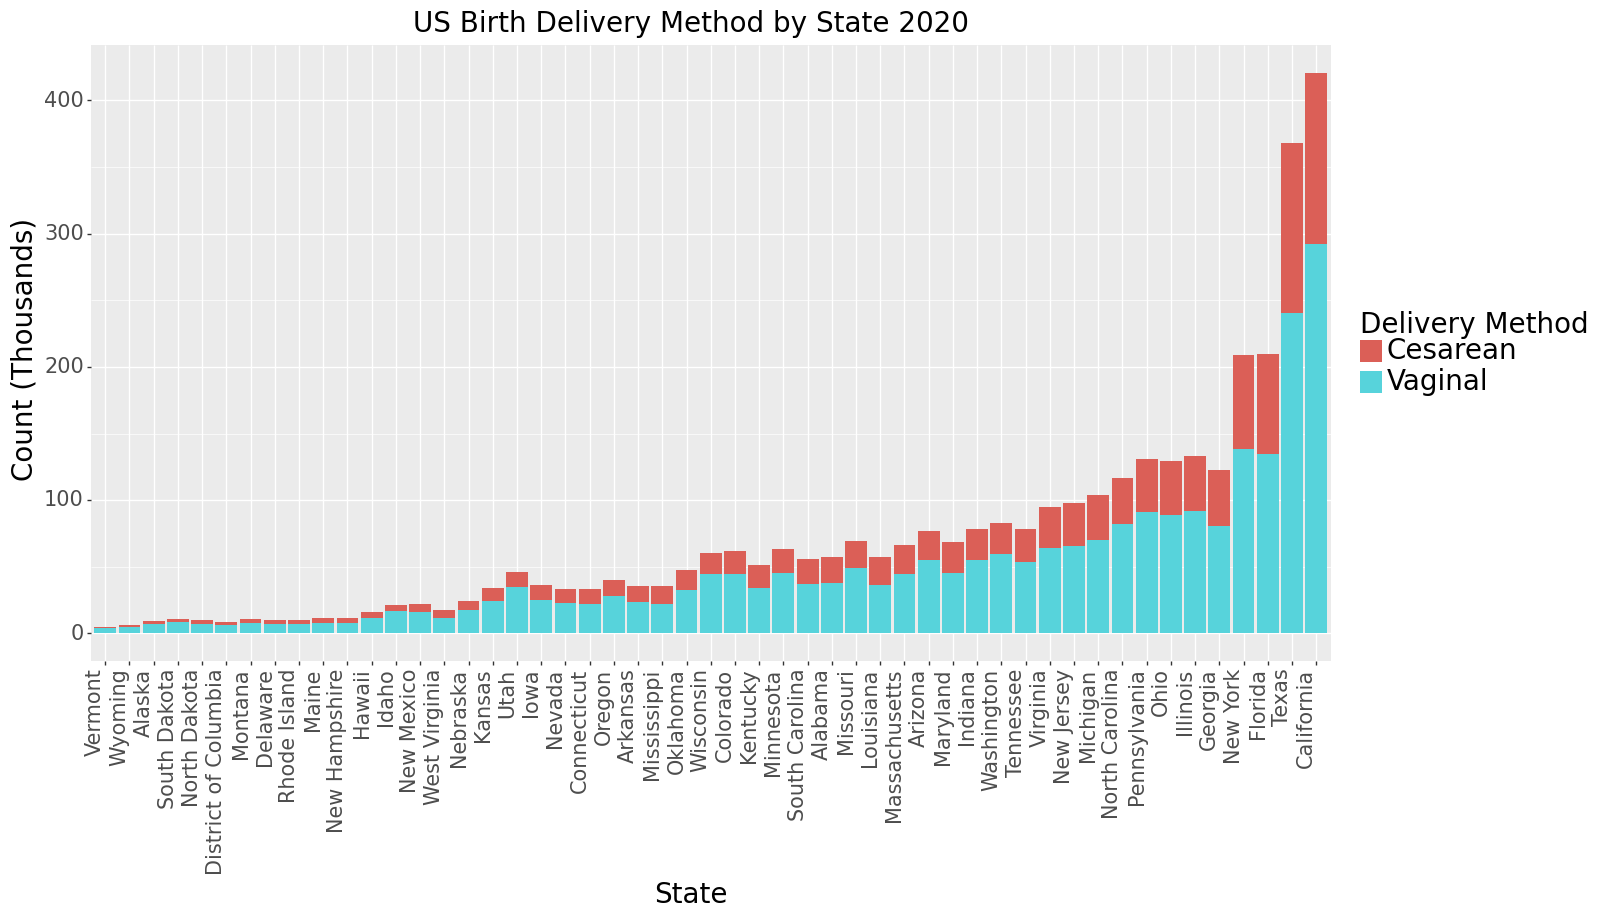

<ggplot: (8793159983607)>

In [24]:


birth_plot = (ggplot(birth, aes(x='State', y='Births', fill='Delivery Method')) 
              + geom_col(size=14) 
              + theme(figure_size=(16,8), axis_text_x=element_text(size=15, rotation=90, hjust=1),
                     text=element_text(size=20), axis_text_y=element_text(size=15)) 
              + labs(y='Count (Thousands)', x='State') 
              + ggtitle('US Birth Delivery Method by State 2020'))

birth_plot


This figure presents the number of births for the year 2020 in each state within the US. I personally, decided to visualize the data into ascending order of the number of births within each state. Each bar within the visualization is split between a vaginal and cesarean delivery methods to analyze which how many states are having higher rates of cesarean delivery. This may spark a discussion of the need to understand any underlying causes of cesarean births. The raw data is from the CDC 2007-2020 Natality Dataset. Although this takes the states out of their normal alphabetical order, this is useful for comparing birth rate based on method of delivery between states because the viewer gains insight on whether a state’s births by higher population (California). 